In [ ]:
print("alisha khatun")

alisha khatun


In [ ]:
from google.colab import files
uploaded = files.upload()

**For data dowloading**

In [ ]:
library(GEOquery)
geo_data <- getGEO("GSE16011", GSEMatrix = TRUE)
head(geo_data)
?geo_data
geo_data <- geo_data[[1]]
head(geo_data)
str(geo_data)
expression_data <- exprs(geo_data)
sample_data <- pData(geo_data)
feature_data <- fData(geo_data)
write.csv(expression_data, "C:/Users/Desktop/Project/Datasets/GSE16011_expression_data.csv", row.names = TRUE)

**For normalise data**

In [ ]:
data_16011 <- GSE16011_expression_data
print(nrow(data_16011))
print(ncol(data_16011))
#normalization function
min_max_normalize <- function(x){
  return ((x-min(x))/(max(x) - min(x)))
}
normalized_dataset_16011 <- as.data.frame(lapply(data_16011[, 2:285], function(x) {
  if(is.numeric(x)) {
    return(min_max_normalize(x))
  } else {
    return(x)
  }
}))
write.csv(normalized_dataset_16011, "C:/Users/Desktop/Project/Datasets/Normalized_GSE16011_expression_data.csv", row.names = FALSE)
n_data <- Normalized_GSE16011_expression_data
first_col <- data_16011[, 1]
df2 <- cbind(first_col, n_data)
colnames(df2)[1] <- "id"
head(df2)
write.csv(df2, "C:/Users/Desktop/Project/Datasets/Normalized_GSE16011_expression_data_with_ID.csv", row.names = FALSE)

**For data dowloading**

In [ ]:
library(GEOquery)

geo_data <- getGEO("GSE108474", GSEMatrix = TRUE)
head(geo_data)
?geo_data

geo_data <- geo_data[[1]]


head(geo_data)
str(geo_data)

expression_data <- exprs(geo_data)
sample_data <- pData(geo_data)
feature_data <- fData(geo_data)


write.csv(expression_data, "C:/Users/Desktop/Project/Datasets/GSE108474_expression_data.csv", row.names = TRUE)



**For normalise data**

In [ ]:
gse_108474 <- GSE108474_expression_data
print(nrow(gse_108474))
print(ncol(gse_108474))


#normalization function
min_max_normalize <- function(x){
  return ((x-min(x))/(max(x) - min(x)))
}

normalized_dataset_108474 <- as.data.frame(lapply(gse_108474[, 2:542], function(x) {
  if(is.numeric(x)) {
    return(min_max_normalize(x))
  } else {
    return(x)
  }
}))

write.csv(normalized_dataset_108474, "C:/Users/Desktop/Project/Datasets/Normalized_GSE108474_expression_data.csv", row.names = FALSE)

n_data_108474 <- Normalized_GSE108474_expression_data

ncol(n_data_108474)


first_col <- gse_108474[, 1]

df2 <- cbind(first_col, n_data_108474)
colnames(df2)[1] <- "id"
head(df2)

write.csv(df2, "C:/Users/Desktop/Project/Datasets/Normalized_GSE108474_expression_data_with_ID.csv", row.names = FALSE)


# **From this portion work will be done on the Normalize Datasets**

Step-1: Uploading the Normalize 16011 File here by running the following cell..

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Normalized_GSE16011_expression_data_with_ID.csv to Normalized_GSE16011_expression_data_with_ID.csv


Step-2: Loading Necessary Python libraries

Loading the Normalized 16011 data into the "data_16011" variable using pandas library in python



In [ ]:
import pandas as pd
data_16011 = pd.read_csv("Normalized_GSE16011_expression_data_with_ID.csv")

To view the uploaded generated files while doing the K - Means Clustering with different values of K in CSV(Comma Speerated Value - kind of Excel file but better for storing numeric results) file

In [ ]:
import os

# List the files in the current directory
uploaded_files = os.listdir()

# Display the list of uploaded files
print(uploaded_files)

['.config', 'gmm_pairplot.png', 'gmm_parameters.npy', 'gmm_clustering_plot.png', 'gmm_density_contour.png', 'Normalized_GSE16011_expression_data_with_ID.csv', 'gmm_clustering_results.csv', 'gmm_3d_scatter.png', 'hierarchical_clustering_result.csv', 'gmm_cluster_distribution.png', 'sample_data']


For downloading the K-Menas Results

# **Final K Means Results**

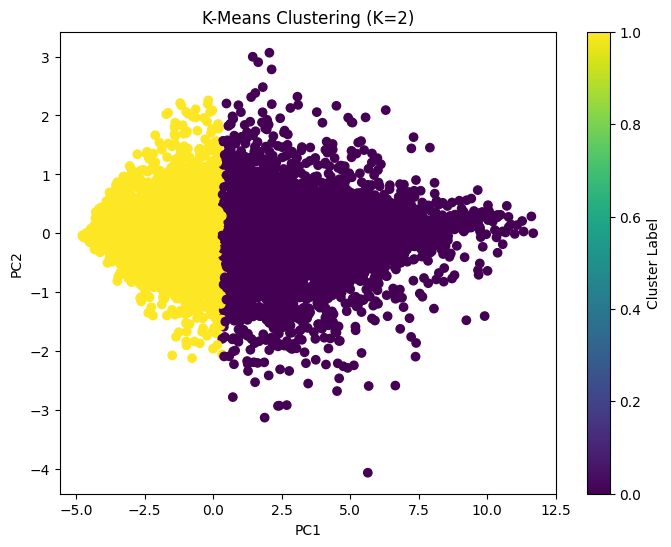

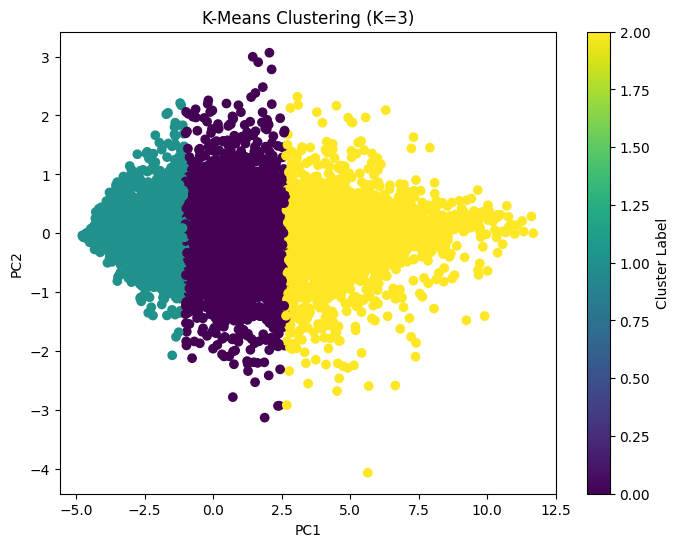

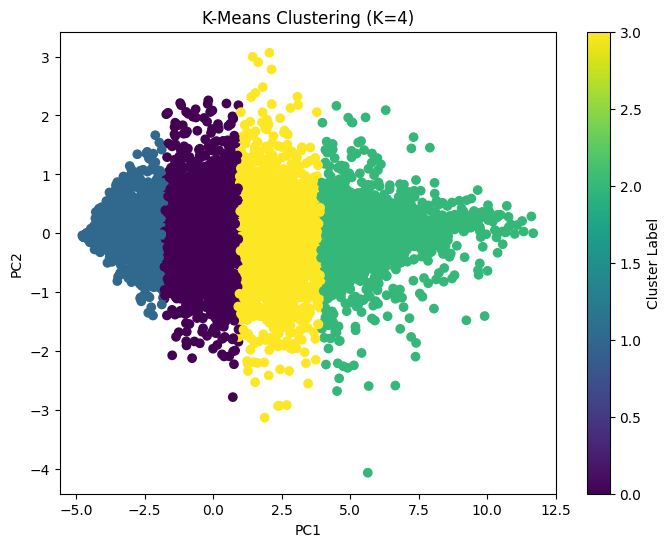

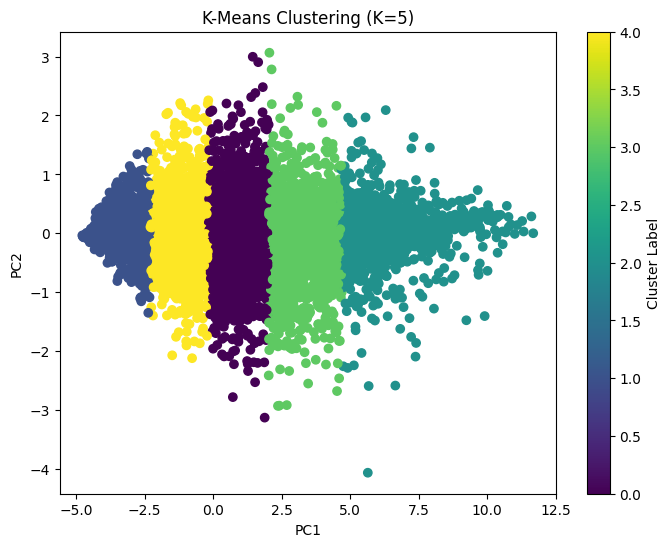

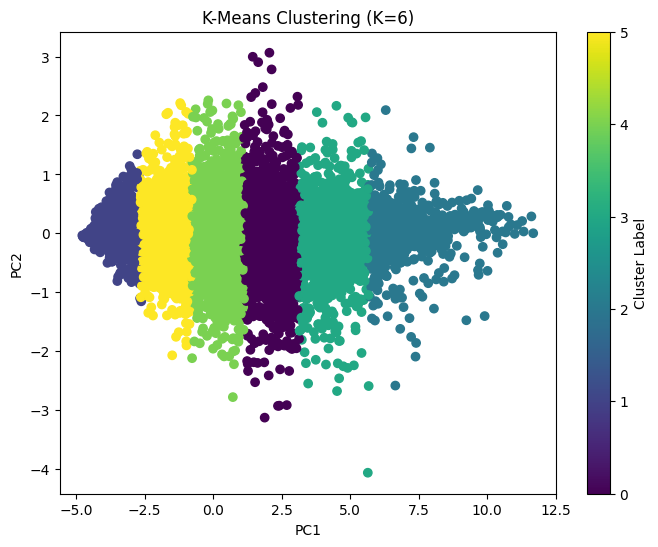

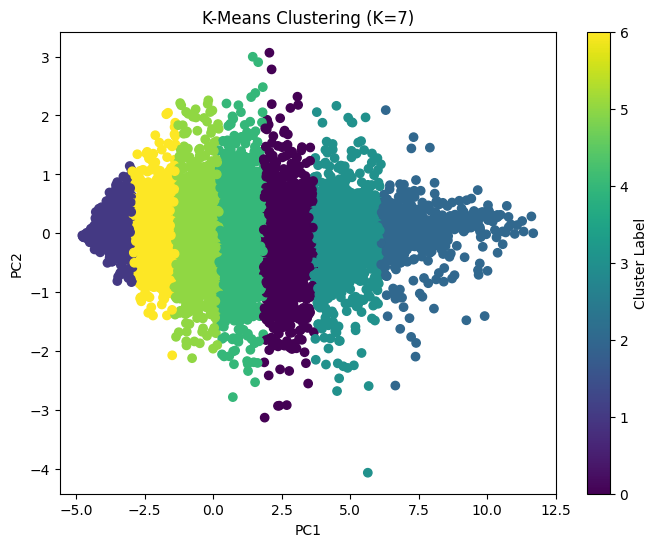

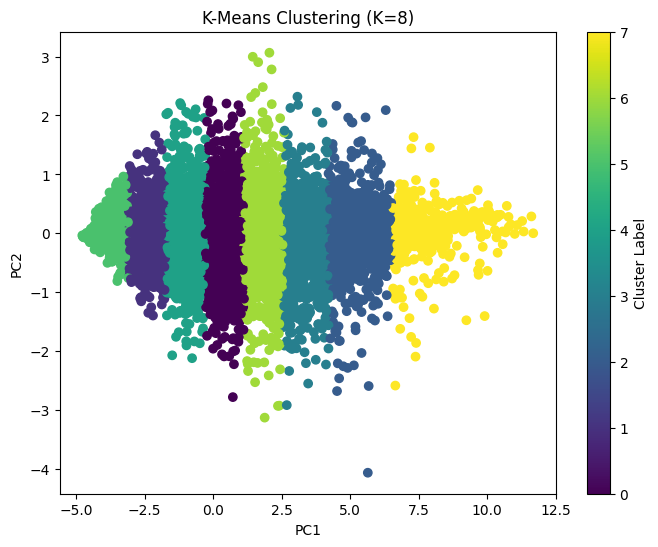

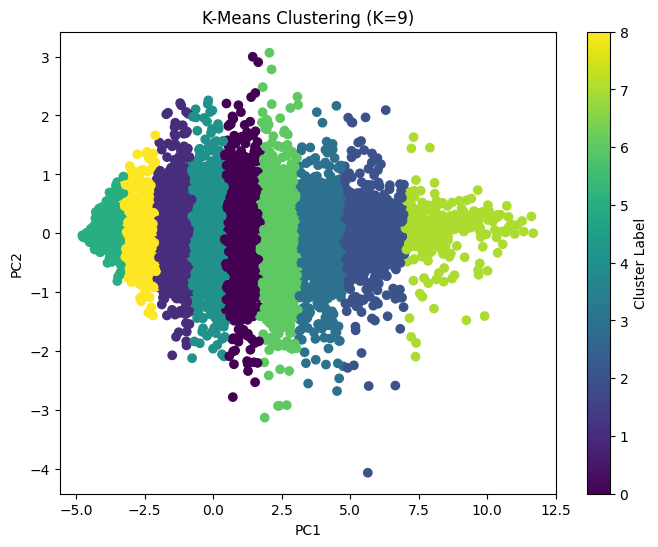

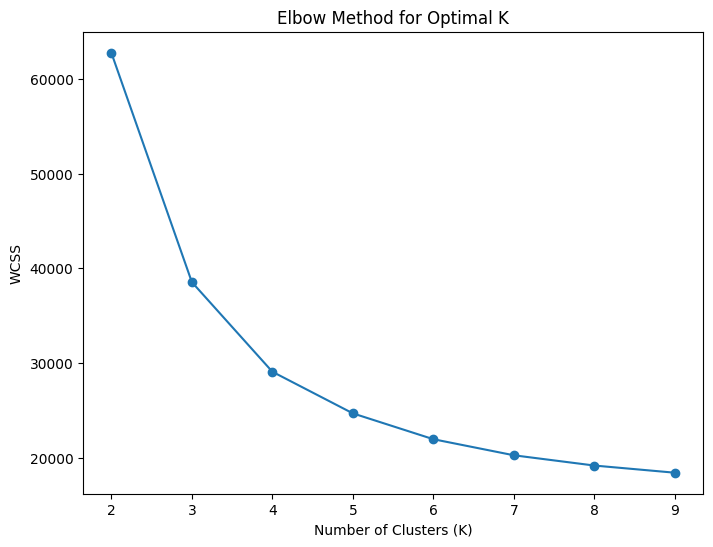


Evaluation metrics for K=2:
Silhouette Score: 0.5227932169794106
Calinski-Harabasz Score: 30528.340520242145
Dunn Index: 0.047922569549907354

Evaluation metrics for K=3:
Silhouette Score: 0.452618981575149
Calinski-Harabasz Score: 30343.026378175815
Dunn Index: 0.0573608073916548

Evaluation metrics for K=4:
Silhouette Score: 0.4000492881319448
Calinski-Harabasz Score: 28699.038786485886
Dunn Index: 0.04928173688323487

Evaluation metrics for K=5:
Silhouette Score: 0.3473556781887016
Calinski-Harabasz Score: 26127.675951695117
Dunn Index: 0.04617700995063828

Evaluation metrics for K=6:
Silhouette Score: 0.31442233749883247
Calinski-Harabasz Score: 23928.305859008193
Dunn Index: 0.04481585230438973

Evaluation metrics for K=7:
Silhouette Score: 0.2774794282133406
Calinski-Harabasz Score: 21849.662560545486
Dunn Index: 0.032946612518565205

Evaluation metrics for K=8:
Silhouette Score: 0.2491501244375451
Calinski-Harabasz Score: 19924.026016039817
Dunn Index: 0.05206737596773626

Eval

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

# Perform PCA (2 components)
pca = PCA(n_components=data.shape[1])
data_pca = pca.fit_transform(data)

# Save PCA results to a CSV file
pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
pca_df.to_csv('pca_results.csv', index=False)  # Save PCA results as CSV

# Function to calculate the Dunn Index (with downsampling for large datasets)
def dunn_index(X, labels, sample_fraction=0.1):
    # Reduce memory usage by subsampling
    sample_size = int(len(X) * sample_fraction)
    # Randomly sample data
    sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
    X_sample = X[sample_indices]  # Subset of data
    labels_sample = labels[sample_indices]  # Corresponding labels for the sampled data

    n_clusters = len(np.unique(labels_sample))

    # Calculate the pairwise distances between each point in the sample
    pairwise_distances = cdist(X_sample, X_sample)

    # Initialize the minimum inter-cluster distance and maximum intra-cluster distance
    min_inter_cluster_dist = np.inf
    max_intra_cluster_dist = -np.inf

    for i in range(n_clusters):
        # Get the points belonging to the current cluster
        cluster_points = X_sample[labels_sample == i]

        # Calculate the diameter of the current cluster (maximum intra-cluster distance)
        intra_cluster_dist = np.max(cdist(cluster_points, cluster_points))
        max_intra_cluster_dist = max(max_intra_cluster_dist, intra_cluster_dist)

        for j in range(i + 1, n_clusters):
            # Get the points belonging to the other cluster
            other_cluster_points = X_sample[labels_sample == j]

            # Calculate the distance between the two clusters (minimum inter-cluster distance)
            inter_cluster_dist = np.min(cdist(cluster_points, other_cluster_points))
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_cluster_dist)

    # Dunn Index: min inter-cluster distance / max intra-cluster distance
    return min_inter_cluster_dist / max_intra_cluster_dist

# Step 4: K-Means Clustering for different values of K (2, 3, 4)
wcss = []  # To store WCSS for each value of k
sil_scores = []  # To store Silhouette Scores for each k
dunn_scores = []  # To store Dunn Index for each k
calinski_scores = []  # To store Calinski-Harabasz scores for each k

# Iterate over the values of K (2 to 9)
for k in range(2, 10):  # For k = 2 to k = 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)  # Use data_pca for clustering

    # Compute WCSS (Within-Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)

    # Calculate the clustering evaluation metrics
    cluster_labels = kmeans.labels_

    # Silhouette Score
    sil_score = silhouette_score(data_pca, cluster_labels)
    sil_scores.append(sil_score)

    # Calinski-Harabasz Score
    calinski_score = calinski_harabasz_score(data_pca, cluster_labels)
    calinski_scores.append(calinski_score)

    # Dunn Index (with downsampling to avoid memory crash)
    dunn_idx = dunn_index(data_pca, cluster_labels, sample_fraction=0.1)  # 10% sample
    dunn_scores.append(dunn_idx)

    # Save individual clustering results to CSV (with the first column removed)
    clustered_data = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
    clustered_data['Cluster'] = cluster_labels

    # Drop the first column of the PCA result and save the remaining columns with cluster labels
    clustered_data_without_first_column = clustered_data.iloc[:, 1:]

    # Save the results for the current value of K to a CSV file
    clustered_data_without_first_column.to_csv(f'clustered_results_k{k}.csv', index=False)

    # Save cluster centers as CSV
    cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
    cluster_centers.to_csv(f'cluster_centers_k{k}.csv', index=False)

    # Plot the clustering results
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', label=f'K={k}')
    plt.title(f'K-Means Clustering (K={k})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Step 5: Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Step 6: Choose the optimal K based on the elbow method
optimal_k = 3  # Change this after observing the elbow plot

# Step 7: Print the clustering evaluation metrics for the values K = 2, 3, and 4
for k in range(2, 10):  # For K=2 to K=9
    print(f"\nEvaluation metrics for K={k}:")
    print(f"Silhouette Score: {sil_scores[k - 2]}")
    print(f"Calinski-Harabasz Score: {calinski_scores[k - 2]}")
    print(f"Dunn Index: {dunn_scores[k - 2]}")


In [ ]:
from google.colab import files

# Replace 'clustering_result.csv' with your file name
kmeans_clustering_k2 = 'clustered_results_k2.csv'
kmeans_clustering_k3 = 'clustered_results_k3.csv'
kmeans_clustering_k4 = 'clustered_results_k4.csv'
kmeans_clustering_k5 = 'clustered_results_k5.csv'
kmeans_clustering_k6 = 'clustered_results_k6.csv'
kmeans_clustering_k7 = 'clustered_results_k7.csv'
kmeans_clustering_k8 = 'clustered_results_k8.csv'
kmeans_clustering_k9 = 'clustered_results_k9.csv'

kmeans_centers_k2 = 'cluster_centers_k2.csv'
kmeans_centers_k3 = 'cluster_centers_k3.csv'
kmeans_centers_k4 = 'cluster_centers_k4.csv'
kmeans_centers_k5 = 'cluster_centers_k5.csv'
kmeans_centers_k6 = 'cluster_centers_k6.csv'
kmeans_centers_k7 = 'cluster_centers_k7.csv'
kmeans_centers_k8 = 'cluster_centers_k8.csv'
kmeans_centers_k9 = 'cluster_centers_k9.csv'


# Download the file
files.download(kmeans_clustering_k2)
files.download(kmeans_clustering_k3)
files.download(kmeans_clustering_k4)
files.download(kmeans_clustering_k5)
files.download(kmeans_clustering_k6)
files.download(kmeans_clustering_k7)
files.download(kmeans_clustering_k8)
files.download(kmeans_clustering_k9)

files.download(kmeans_centers_k3)
files.download(kmeans_centers_k4)
files.download(kmeans_centers_k5)
files.download(kmeans_centers_k6)
files.download(kmeans_centers_k7)
files.download(kmeans_centers_k8)
files.download(kmeans_centers_k9)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Final Hierarchical Results**

Divisive hierarchical clustering result saved to 'divisive_clustering_result.csv'.

Evaluation Metrics for Divisive Clustering:
Silhouette Score: 0.48816171632905264
Calinski-Harabasz Score: 12653.164911345812
Dunn Index: 0.013005174446759341


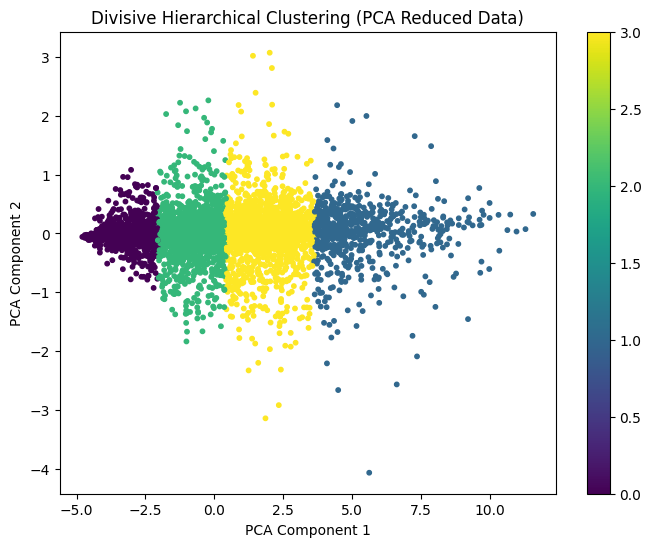

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

# Function to calculate Dunn Index (optimized)
def dunn_index(X, labels, sample_fraction=0.1):
    """
    Calculate the Dunn Index for clustering results (optimized for large datasets).

    Parameters:
    - X: Input data (numpy array).
    - labels: Cluster labels for each data point.
    - sample_fraction: Fraction of data to sample for Dunn Index calculation.

    Returns:
    - Dunn Index value.
    """
    # Sample the data to reduce computational overhead
    sample_size = int(len(X) * sample_fraction)
    sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
    X_sample = X[sample_indices]
    labels_sample = labels[sample_indices]

    unique_labels = np.unique(labels_sample)
    n_clusters = len(unique_labels)

    if n_clusters < 2:
        raise ValueError("Dunn Index requires at least two clusters.")

    # Compute pairwise distances for the sampled data
    pairwise_distances = cdist(X_sample, X_sample)

    # Calculate inter-cluster distances
    inter_cluster_distances = np.inf
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X_sample[labels_sample == unique_labels[i]]
            cluster_j = X_sample[labels_sample == unique_labels[j]]
            distances = cdist(cluster_i, cluster_j)
            inter_cluster_distances = min(inter_cluster_distances, np.min(distances))

    # Calculate intra-cluster distances
    intra_cluster_distances = 0
    for i in range(n_clusters):
        cluster_i = X_sample[labels_sample == unique_labels[i]]
        distances = cdist(cluster_i, cluster_i)
        intra_cluster_distances = max(intra_cluster_distances, np.max(distances))

    return inter_cluster_distances / intra_cluster_distances

# Function to perform divisive hierarchical clustering
def divisive_clustering(X, max_clusters=5, min_cluster_size=10):
    """
    Perform divisive hierarchical clustering using k-means as the splitting method.

    Parameters:
    - X: Input data (numpy array).
    - max_clusters: Maximum number of clusters to create.
    - min_cluster_size: Minimum size of a cluster to continue splitting.

    Returns:
    - cluster_labels: Final cluster labels for each data point.
    """
    n_samples = X.shape[0]
    cluster_labels = np.zeros(n_samples, dtype=int)  # Start with all points in one cluster
    cluster_id = 0  # Current cluster ID
    clusters_to_split = [np.arange(n_samples)]  # Indices of data points in each cluster

    while len(clusters_to_split) > 0 and cluster_id < max_clusters - 1:
        current_cluster_indices = clusters_to_split.pop(0)  # Get the next cluster to split
        if len(current_cluster_indices) < min_cluster_size:
            continue  # Skip small clusters

        current_data = X[current_cluster_indices]

        # Split the cluster using k-means with k=2
        kmeans = KMeans(n_clusters=2, random_state=42)
        split_labels = kmeans.fit_predict(current_data)

        # Create new cluster IDs
        cluster_labels[current_cluster_indices[split_labels == 1]] = cluster_id + 1

        # Add new clusters to the list for further splitting
        clusters_to_split.append(current_cluster_indices[split_labels == 0])
        clusters_to_split.append(current_cluster_indices[split_labels == 1])

        cluster_id += 1  # Increment cluster ID

    return cluster_labels

# Load the dataset
data = data_16011  # Replace this with the actual DataFrame variable

# Assuming the first column contains gene names
gene_names = data.iloc[:, 0]  # Use the first column for gene names

# Prepare data for clustering: Drop non-numeric columns
features = data.drop(columns=[data.columns[0]])  # Drop the first column (gene names)

# Limit the data size to reduce memory usage
features = features.sample(n=5000, random_state=42)  # Reduce to 5000 rows
gene_names = gene_names.loc[features.index]  # Match the reduced indices

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 3 components for efficiency
features_pca = pca.fit_transform(features)

# Perform divisive hierarchical clustering
cluster_labels = divisive_clustering(features_pca, max_clusters=4, min_cluster_size=10)

# Add cluster labels to the features
features['Cluster'] = cluster_labels
features['Gene_ID'] = gene_names  # Add gene names for reference

# Save results
output_file = 'divisive_clustering_result.csv'
features.to_csv(output_file, index=False)
print(f"Divisive hierarchical clustering result saved to '{output_file}'.")

# Calculate clustering metrics if there are multiple clusters
num_clusters = len(np.unique(cluster_labels))
if num_clusters > 1:
    sil_score = silhouette_score(features_pca, cluster_labels)
    calinski_score = calinski_harabasz_score(features_pca, cluster_labels)
    dunn_idx = dunn_index(features_pca, cluster_labels, sample_fraction=0.1)

    # Print clustering metrics
    print(f"\nEvaluation Metrics for Divisive Clustering:")
    print(f"Silhouette Score: {sil_score}")
    print(f"Calinski-Harabasz Score: {calinski_score}")
    print(f"Dunn Index: {dunn_idx}")
else:
    print(f"Only {num_clusters} cluster(s) found. Metrics cannot be computed.")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title('Divisive Hierarchical Clustering (PCA Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='')
plt.show()


In [ ]:
from google.colab import files

Divisive_Clustering_Results_GSE16011 = 'divisive_clustering_result.csv'
files.download(Divisive_Clustering_Results_GSE16011)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

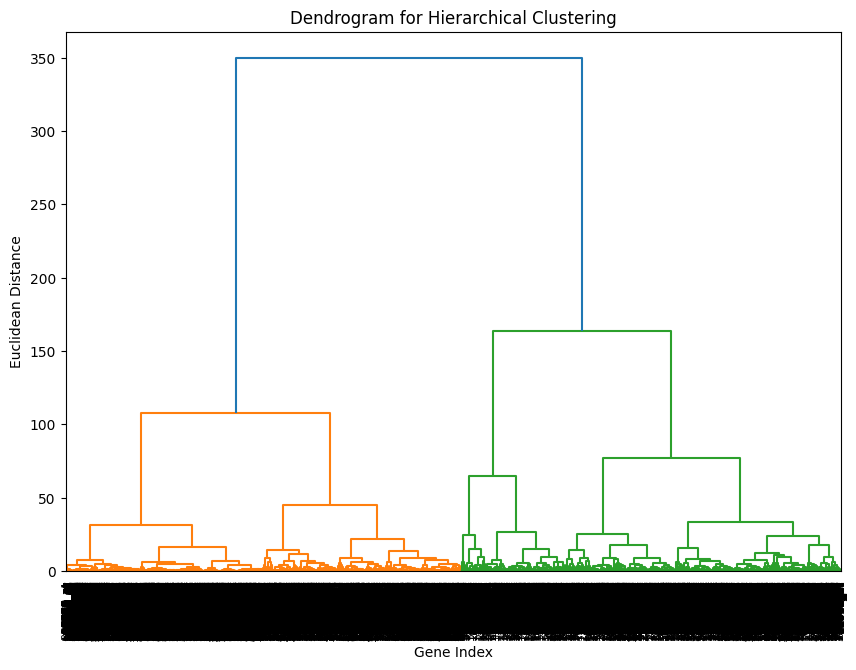

Number of unique clusters formed: 6
Cluster distribution: [   0 2548 2563  304 1032 1424 2129]
Hierarchical clustering result saved to '/content/hierarchical_clustering_result.csv'.


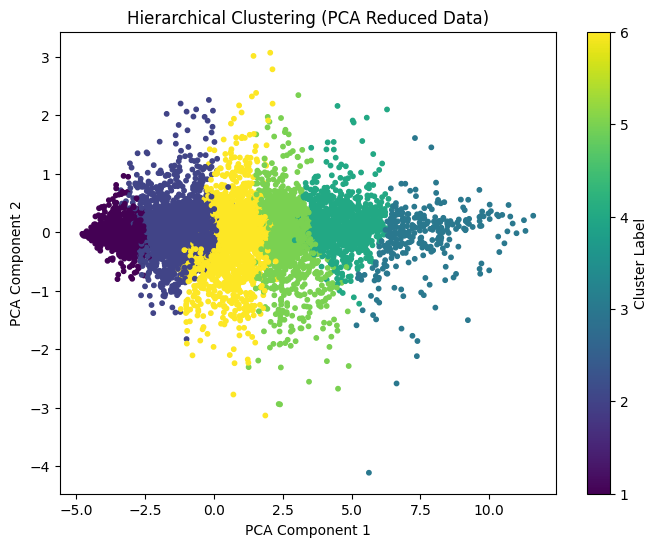

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

# Function to find the closest gene to each cluster center
def find_closest_gene(center, data_points, gene_ids):
    distances = np.linalg.norm(data_points - center, axis=1)
    closest_index = np.argmin(distances)
    return gene_ids.iloc[closest_index], data_points[closest_index]

data = data_16011

# Assuming the first column (index) contains the gene names (row indices), we'll set it accordingly
gene_names = data.iloc[:, 0]  # Use the first column for gene names (adjust if necessary)

# Store the original data
original_data = data.copy()

# Prepare data for clustering: Drop non-numeric columns (i.e., gene names in the first column)
features = data.drop(columns=[data.columns[0]])  # Drop the first column which contains gene names

# Shuffle the data to ensure randomness and reduce data size by selecting a subset of rows
features, gene_names = shuffle(features, gene_names, random_state=42)
features = features.head(10000)  # Reduce to first 10,000 rows for memory efficiency
gene_names = gene_names.head(10000)

# Apply PCA for dimensionality reduction (you can adjust n_components as needed)
pca = PCA(n_components=5)  # Reduce to 5 dimensions to save memory
features_pca = pca.fit_transform(features)

# Perform hierarchical clustering using 'ward' linkage method
Z = linkage(features_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel('Gene Index')
plt.ylabel('Euclidean Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=gene_names.values)
plt.show()

# Define the number of clusters based on the dendrogram
max_d = 50  # Adjust this value based on where you want to cut the dendrogram
cluster_labels = fcluster(Z, max_d, criterion='distance')

# Print the number of unique clusters and their distribution
unique_clusters = np.unique(cluster_labels)
print(f"Number of unique clusters formed: {len(unique_clusters)}")
print(f"Cluster distribution: {np.bincount(cluster_labels)}")

# Only proceed with evaluation metrics if there are multiple clusters
if len(unique_clusters) > 1:
    # Add the cluster labels to the **subset** of the reduced data (10,000 rows)
    features['Cluster'] = cluster_labels

    # Save the clustered genes to a CSV file (only the subset)
    output_file = '/content/hierarchical_clustering_result.csv'  # Save to the current directory in Colab
    features['Gene_ID'] = gene_names  # Add the gene names for reference
    features.to_csv(output_file, index=False)

    print(f"Hierarchical clustering result saved to '{output_file}'.")

    # Optional: Visualize clusters if necessary
    plt.figure(figsize=(8, 6))
    plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
    plt.title('Hierarchical Clustering (PCA Reduced Data)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

    # Step 5: Calculate clustering evaluation metrics for hierarchical clustering
    sil_score = silhouette_score(features_pca, cluster_labels)
    calinski_score = calinski_harabasz_score(features_pca, cluster_labels)

    # Function to calculate Dunn Index (with downsampling for large datasets)
    def dunn_index(X, labels, sample_fraction=0.1):
        sample_size = int(len(X) * sample_fraction)
        sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
        X_sample = X[sample_indices]
        labels_sample = labels[sample_indices]

        n_clusters = len(np.unique(labels_sample))
        pairwise_distances = cdist(X_sample, X_sample)

        min_inter_cluster_dist = np.inf
        max_intra_cluster_dist = -np.inf

        for i in range(n_clusters):
            cluster_points = X_sample[labels_sample == i]
            intra_cluster_dist = np.max(cdist(cluster_points, cluster_points))
            max_intra_cluster_dist = max(max_intra_cluster_dist, intra_cluster_dist)

            for j in range(i + 1, n_clusters):
                other_cluster_points = X_sample[labels_sample == j]
                inter_cluster_dist = np.min(cdist(cluster_points, other_cluster_points))
                min_inter_cluster_dist = min(min_inter_cluster_dist, inter_cluster_dist)

        return min_inter_cluster_dist / max_intra_cluster_dist

    # Calculate Dunn Index for the clustering
    # dunn_idx = dunn_index(features_pca, cluster_labels, sample_fraction=0.1)

    # Print clustering evaluation metrics
    # print(f"\nEvaluation Metrics for Hierarchical Clustering:")
    # print(f"Silhouette Score: {sil_score}")
    # print(f"Calinski-Harabasz Score: {calinski_score}")
    # print(f"Dunn Index: {dunn_idx}")

else:
    print("Clustering resulted in only one cluster. Please adjust 'max_d' or other parameters to generate more clusters.")
    print(f"Cluster labels: {cluster_labels}")  # Print the cluster labels even if only one cluster exists


# **GMM Model implementation**

GMM clustering results saved to 'gmm_clustering_results.csv'.


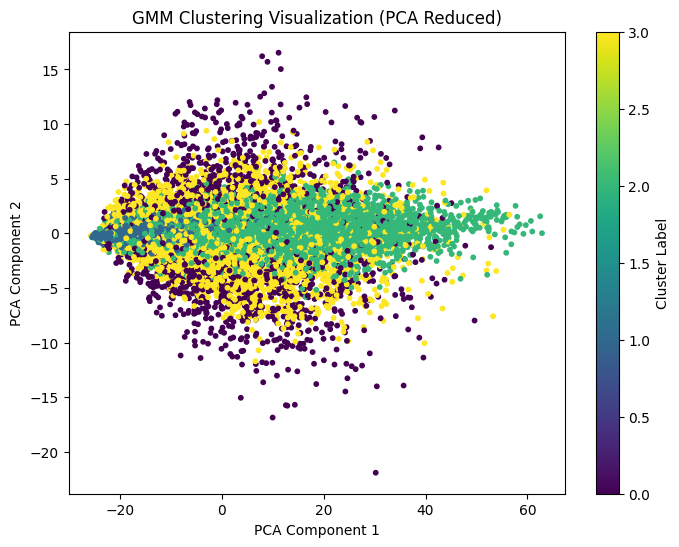

GMM clustering plot saved to 'gmm_clustering_plot.png'.
GMM pairplot saved to 'gmm_pairplot.png'.


<Figure size 1000x800 with 0 Axes>

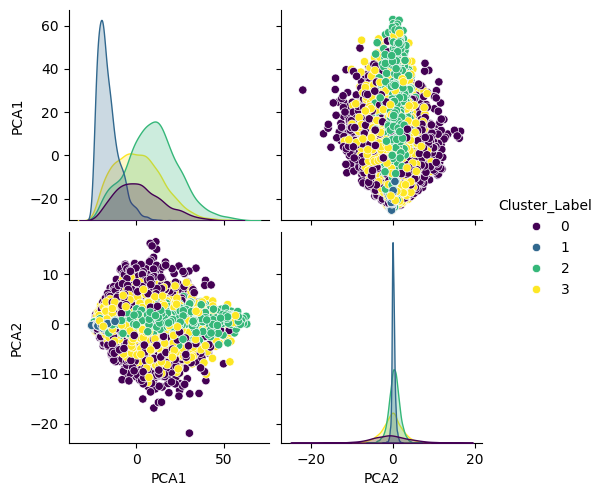

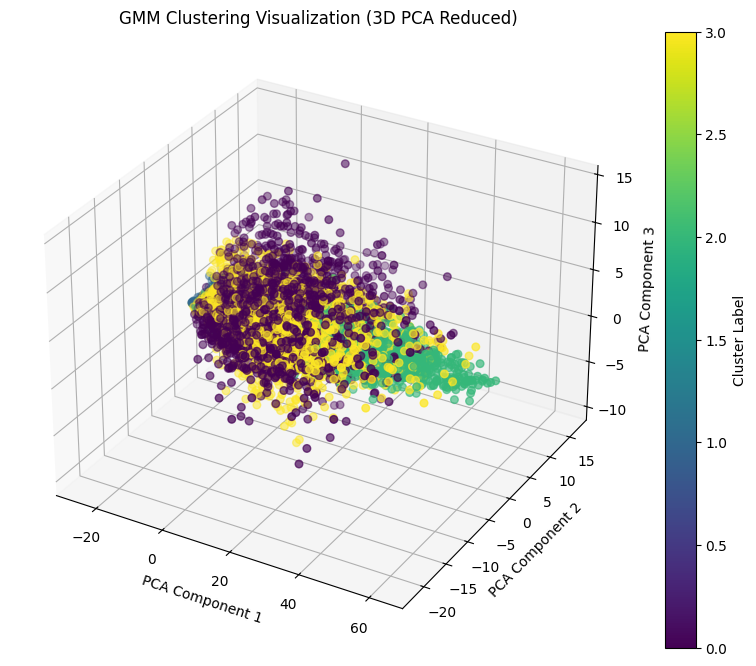

GMM 3D scatter plot saved to 'gmm_3d_scatter.png'.


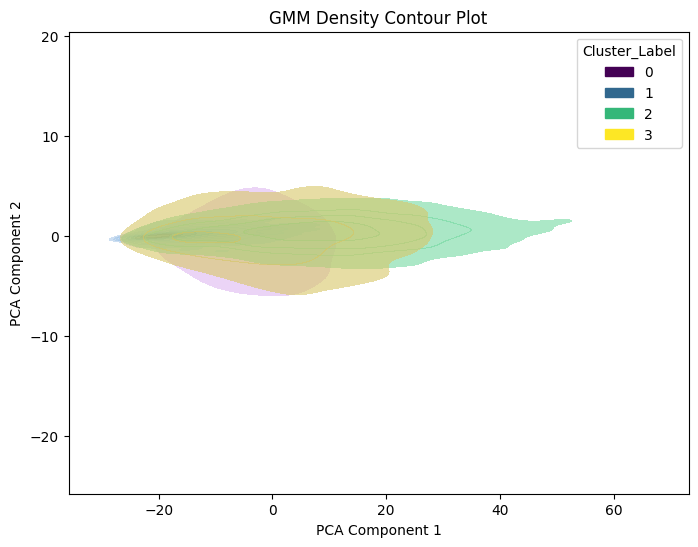

GMM density contour plot saved to 'gmm_density_contour.png'.


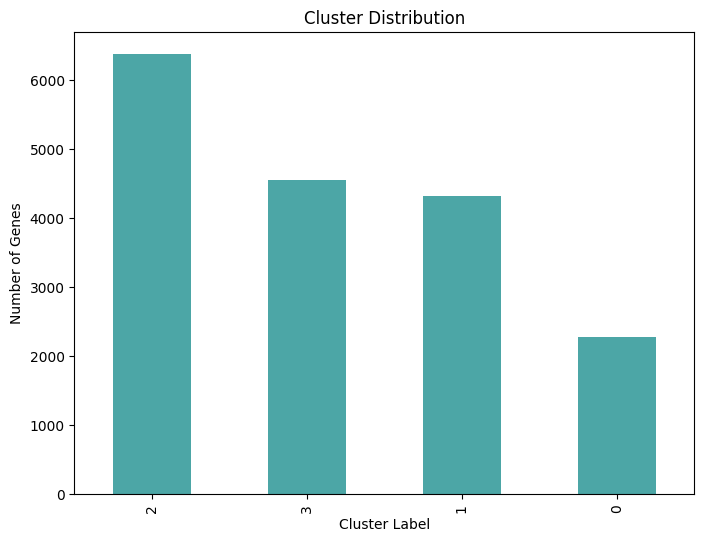

GMM cluster distribution plot saved to 'gmm_cluster_distribution.png'.
GMM parameters saved for further analysis.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = data_16011

# Extract Gene IDs and remove the first column for clustering
gene_ids = data.iloc[:, 0]  # First column contains Gene IDs
features = data.iloc[:, 1:]  # Remaining columns are features

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
features_pca = pca.fit_transform(features_scaled)

# Apply Gaussian Mixture Model
n_clusters = 4  # Adjust based on analysis
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(features_scaled)

# Predict cluster labels
cluster_labels = gmm.predict(features_scaled)

# Create a DataFrame with results
results = pd.DataFrame({
    "Gene_ID": gene_ids,
    "Cluster_Label": cluster_labels
})

# Save the results to a CSV file
results_file = "gmm_clustering_results.csv"
results.to_csv(results_file, index=False)
print(f"GMM clustering results saved to '{results_file}'.")

# Save the PCA-reduced features with cluster labels for visualization
pca_results = pd.DataFrame({
    "PCA1": features_pca[:, 0],
    "PCA2": features_pca[:, 1],
    "Cluster_Label": cluster_labels
})

# Visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_results["PCA1"], pca_results["PCA2"], c=pca_results["Cluster_Label"], cmap="viridis", s=10)
plt.title("GMM Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster Label")
plot_file = "gmm_clustering_plot.png"
plt.savefig(plot_file)
plt.show()
print(f"GMM clustering plot saved to '{plot_file}'.")

# Pairplot with clusters
pca_df = pd.DataFrame(features_pca, columns=["PCA1", "PCA2"])
pca_df["Cluster_Label"] = cluster_labels
plt.figure(figsize=(10, 8))
sns.pairplot(pca_df, hue="Cluster_Label", palette="viridis", diag_kind="kde")
pairplot_file = "gmm_pairplot.png"
plt.savefig(pairplot_file)
print(f"GMM pairplot saved to '{pairplot_file}'.")

# 3D Scatter Plot
pca_3d = PCA(n_components=3).fit_transform(features_scaled)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2],
                     c=cluster_labels, cmap="viridis", s=30)
ax.set_title("GMM Clustering Visualization (3D PCA Reduced)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.colorbar(scatter, label="Cluster Label")
plot_3d_file = "gmm_3d_scatter.png"
plt.savefig(plot_3d_file)
plt.show()
print(f"GMM 3D scatter plot saved to '{plot_3d_file}'.")

# Density Contour Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(x=pca_df["PCA1"], y=pca_df["PCA2"], hue=pca_df["Cluster_Label"],
            fill=True, palette="viridis", alpha=0.6)
plt.title("GMM Density Contour Plot")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
contour_file = "gmm_density_contour.png"
plt.savefig(contour_file)
plt.show()
print(f"GMM density contour plot saved to '{contour_file}'.")

# Cluster Distribution Bar Plot
cluster_counts = pd.Series(cluster_labels).value_counts()
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind="bar", color="teal", alpha=0.7)
plt.title("Cluster Distribution")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Genes")
barplot_file = "gmm_cluster_distribution.png"
plt.savefig(barplot_file)
plt.show()
print(f"GMM cluster distribution plot saved to '{barplot_file}'.")

# Save important GMM parameters for further analysis
gmm_params = {
    "Means": gmm.means_,
    "Covariances": gmm.covariances_,
    "Weights": gmm.weights_
}
np.save("gmm_parameters.npy", gmm_params)
print("GMM parameters saved for further analysis.")


GMM clustering results saved to 'gmm_clustering_results.csv'.


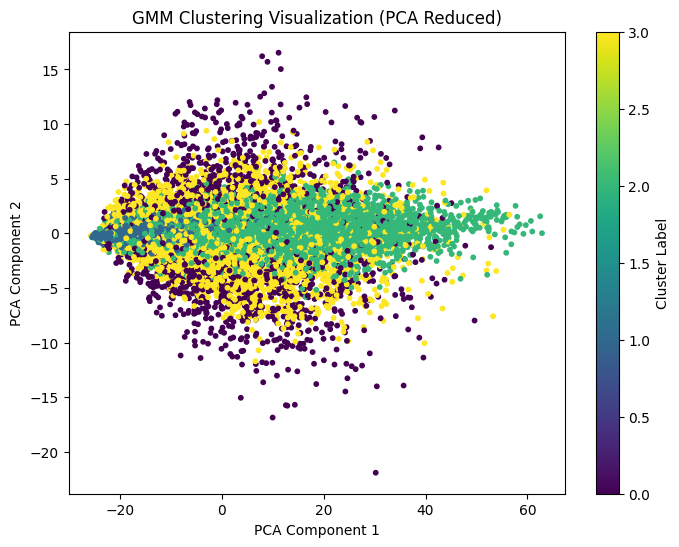

GMM clustering plot saved to 'gmm_clustering_plot.png'.
GMM parameters saved for further analysis.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = data_16011

# Extract Gene IDs and remove the first column for clustering
gene_ids = data.iloc[:, 0]  # First column contains Gene IDs
features = data.iloc[:, 1:]  # Remaining columns are features

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Apply Gaussian Mixture Model
n_clusters = 4  # Adjust based on analysis
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(features_scaled)

# Predict cluster labels
cluster_labels = gmm.predict(features_scaled)

# Create a DataFrame with results
results = pd.DataFrame({
    "Gene_ID": gene_ids,
    "Cluster_Label": cluster_labels
})

# Save the results to a CSV file
results_file = "gmm_clustering_results.csv"
results.to_csv(results_file, index=False)
print(f"GMM clustering results saved to '{results_file}'.")

# Save the PCA-reduced features with cluster labels for visualization
pca_results = pd.DataFrame({
    "PCA1": features_pca[:, 0],
    "PCA2": features_pca[:, 1],
    "Cluster_Label": cluster_labels
})

# Visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_results["PCA1"], pca_results["PCA2"], c=pca_results["Cluster_Label"], cmap="viridis", s=10)
plt.title("GMM Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="")
plot_file = "gmm_clustering_plot.png"
plt.savefig(plot_file)
plt.show()
print(f"GMM clustering plot saved to '{plot_file}'.")

# Save important GMM parameters for further analysis
gmm_params = {
    "Means": gmm.means_,
    "Covariances": gmm.covariances_,
    "Weights": gmm.weights_
}
np.save("gmm_parameters.npy", gmm_params)
print("GMM parameters saved for further analysis.")


In [ ]:
from google.colab import files

GMM_Results_GSE16011 = 'gmm_clustering_results.csv'
files.download(GMM_Results_GSE16011)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GMM clustering results saved to 'gmm_clustering_results.csv'.


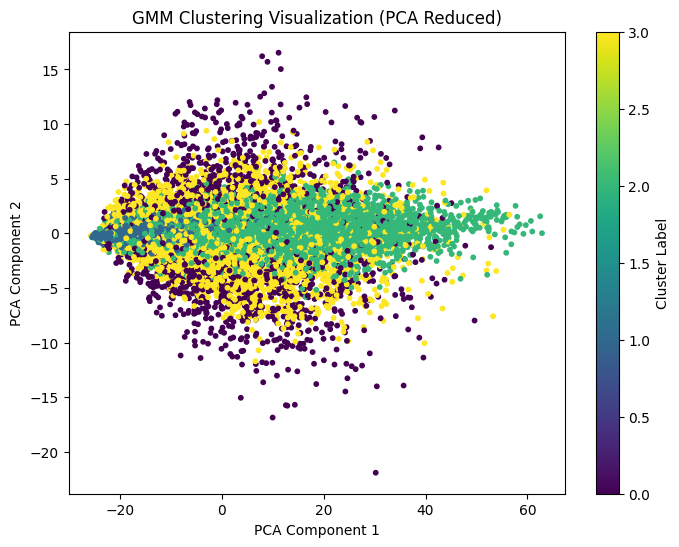

GMM clustering plot saved to 'gmm_clustering_plot.png'.
GMM parameters saved for further analysis.
Silhouette Score: 0.06062896759307854
Calinski-Harabasz Index: 3060.926301063621
Dunn Index: 0.015634622856961863
Validation scores saved to 'validation_scores.txt'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, cdist

# Function to calculate Dunn Index
def dunn_index(features, cluster_labels):
    clusters = np.unique(cluster_labels)
    intra_distances = []
    inter_distances = []

    for cluster in clusters:
        cluster_points = features[cluster_labels == cluster]
        if len(cluster_points) > 1:
            intra_distances.append(np.max(pdist(cluster_points)))
        else:
            intra_distances.append(0)

    for i, cluster_a in enumerate(clusters):
        for cluster_b in clusters[i + 1:]:
            cluster_a_points = features[cluster_labels == cluster_a]
            cluster_b_points = features[cluster_labels == cluster_b]
            inter_distances.append(np.min(cdist(cluster_a_points, cluster_b_points)))

    dunn = np.min(inter_distances) / np.max(intra_distances)
    return dunn

# Load the dataset
data = data_16011

# Extract Gene IDs and remove the first column for clustering
gene_ids = data.iloc[:, 0]  # First column contains Gene IDs
features = data.iloc[:, 1:]  # Remaining columns are features

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Apply Gaussian Mixture Model
n_clusters = 4  # Adjust based on analysis
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(features_scaled)

# Predict cluster labels
cluster_labels = gmm.predict(features_scaled)

# Create a DataFrame with results
results = pd.DataFrame({
    "Gene_ID": gene_ids,
    "Cluster_Label": cluster_labels
})

# Save the results to a CSV file
results_file = "gmm_clustering_results.csv"
results.to_csv(results_file, index=False)
print(f"GMM clustering results saved to '{results_file}'.")

# Save the PCA-reduced features with cluster labels for visualization
pca_results = pd.DataFrame({
    "PCA1": features_pca[:, 0],
    "PCA2": features_pca[:, 1],
    "Cluster_Label": cluster_labels
})

# Visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_results["PCA1"], pca_results["PCA2"], c=pca_results["Cluster_Label"], cmap="viridis", s=10)
plt.title("GMM Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster Label")
plot_file = "gmm_clustering_plot.png"
plt.savefig(plot_file)
plt.show()
print(f"GMM clustering plot saved to '{plot_file}'.")

# Save important GMM parameters for further analysis
gmm_params = {
    "Means": gmm.means_,
    "Covariances": gmm.covariances_,
    "Weights": gmm.weights_
}
np.save("gmm_parameters.npy", gmm_params)
print("GMM parameters saved for further analysis.")

# Calculate Validation Metrics
silhouette_avg = silhouette_score(features_scaled, cluster_labels)
calinski_harabasz = calinski_harabasz_score(features_scaled, cluster_labels)
dunn = dunn_index(features_scaled, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Dunn Index: {dunn}")

# Save validation metrics to a file
validation_scores = {
    "Silhouette Score": silhouette_avg,
    "Calinski-Harabasz Index": calinski_harabasz,
    "Dunn Index": dunn
}

with open("validation_scores.txt", "w") as f:
    for metric, value in validation_scores.items():
        f.write(f"{metric}: {value}\n")

print("Validation scores saved to 'validation_scores.txt'.")


Generating the centroids for 16011

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Step 2: Load the dataset
data_16011 = pd.read_csv("Normalized_GSE16011_expression_data_with_ID.csv")

# Step 3: Separate ID and expression data
ids = data_16011['id']
expression_data = data_16011.drop(columns=['id'])

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(expression_data)

# Step 5: Get centroids
centroids = kmeans.cluster_centers_

# Step 6: Find closest data point (gene) to each centroid
closest_indices, distances = pairwise_distances_argmin_min(centroids, expression_data)

# Step 7: Get the corresponding gene IDs and distances
centroid_genes = pd.DataFrame({
    'cluster': range(4),
    'closest_gene_id': ids.iloc[closest_indices].values,
    'distance_to_centroid': distances
})

# Step 8: Save to Excel
excel_path = "kmeans_centroid_genes_k4.xlsx"
centroid_genes.to_excel(excel_path, index=False)

# Step 9: Download in Colab
from google.colab import files
files.download(excel_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Generating the centroids for the Another dataset

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
data_108474 = pd.read_csv("Normalized_GSE108474_expression_data_with_ID.csv")

Saving Normalized_GSE108474_expression_data_with_ID.csv to Normalized_GSE108474_expression_data_with_ID.csv


In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Step 2: Load the dataset
data_108474 = pd.read_csv("Normalized_GSE108474_expression_data_with_ID.csv")

# Step 3: Separate ID and expression data
ids = data_108474 ['id']
expression_data = data_108474 .drop(columns=['id'])

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(expression_data)

# Step 5: Get centroids
centroids = kmeans.cluster_centers_

# Step 6: Find closest data point (gene) to each centroid
closest_indices, distances = pairwise_distances_argmin_min(centroids, expression_data)

# Step 7: Get the corresponding gene IDs and distances
centroid_genes = pd.DataFrame({
    'cluster': range(3),
    'closest_gene_id': ids.iloc[closest_indices].values,
    'distance_to_centroid': distances
})

# Step 8: Save to Excel
excel_path = "kmeans_centroid_genes_k3.xlsx"
centroid_genes.to_excel(excel_path, index=False)

# Step 9: Download in Colab
from google.colab import files
files.download(excel_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>